### Product Portfolio —



*   The **KP281** is an *entry-level treadmill*  that sells for \$1,500.
*   The **KP481** is *for mid-level runners*  that sells for \$1,750.
*   The **KP781** treadmill is having *advanced features*  that sells for \$2,500.



## Problem Statement —

#### 1.   Create customer profiles for each AeroFit treadmill product.
#### 2.   Analyze product performance in different categories and its impact on the business, and identify areas of improvement.




## Report Structure —

1. Preparing Data & Styling code
2. Basic metrics
3. Data Cleaning
5. Birds-eye View
6. Customer Profiling & Product Performance
7. Business Insights
8. Recommendations

*Please note every section started from new page and, a section can span multiple pages.*

## Preparing Data

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 32.1MB/s]


In [ ]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
aerofit = pd.read_csv('aerofit_treadmill.csv')

In [ ]:
# @title Styling code
import pandas as pd
from IPython.display import display, HTML
from bs4 import BeautifulSoup

def display_side_by_side(*args):
  html = f"""
  <div style="display: flex; justify-content: flex-start;">
  """

  for df in args[:-1]:
    html += f"""
      <div style="margin-right: 2em;">{df.to_html()}</div>
    """
  html += f"""<div>{args[-1].to_html()}</div></div>"""
  return display(HTML(html))


## Basic metrics


### In this section, we'll try to identify —


1.   Number of rows and columns of data.
2.   Data type of each column, non-null values in each column and memory usage by the dataset.
3.   How data looks like, by taking sample of 5 rows out of it.
4.   Distinct values in each column.
5.   If dataset contains duplicated rows.

In [ ]:
# Number of rows and columns of data.
aerofit.shape

(180, 9)

In [ ]:
# Data type of each column, non-null values in each column and memory usage by the dataset.
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


As we can see there are **no** null / missing values in the dataset.

In [ ]:
# How data looks like, by taking sample of 5 rows out of it.
aerofit.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
123,KP481,33,Female,16,Partnered,5,3,53439,95
76,KP281,44,Female,16,Single,3,4,57987,75
164,KP781,28,Male,18,Single,6,5,88396,150
77,KP281,46,Female,16,Partnered,3,2,60261,47


In [ ]:
# Distinct values in each column
aerofit.nunique().rename('Distinct Values').reset_index().T \
  .style.hide(axis='columns')

index,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Distinct Values,3,32,2,8,2,6,5,62,37


In [ ]:
# If dataset contains duplicated rows.
aerofit.duplicated().sum()

0

### Statistical summary

In [ ]:
# For numerical columns.
describe = aerofit.select_dtypes(exclude='object').describe().T
describe['range'] = describe['max'] - describe['min']
describe['mode'] = aerofit.select_dtypes(exclude='object').mode().iloc[0]
describe['IQR'] = describe['75%'] - describe['25%']
describe[
    [
        'count', 'range', 'mean', 'mode', 'std',
        'min', '25%', '50%', '75%', 'max', 'IQR'
    ]
].style.format('{:.2f}')

,count,range,mean,mode,std,min,25%,50%,75%,max,IQR
Age,180.00,32.00,28.79,25.00,6.94,18.00,24.00,26.00,33.00,50.00,9.00
Education,180.00,9.00,15.57,16.00,1.62,12.00,14.00,16.00,16.00,21.00,2.00
Usage,180.00,5.00,3.46,3.00,1.08,2.00,3.00,3.00,4.00,7.00,1.00
Fitness,180.00,4.00,3.31,3.00,0.96,1.00,3.00,3.00,4.00,5.00,1.00
Income,180.00,75019.00,53719.58,45480.00,16506.68,29562.00,44058.75,50596.50,58668.00,104581.00,14609.25
Miles,180.00,339.00,103.19,85.00,51.86,21.00,66.00,94.00,114.75,360.00,48.75


In [ ]:
# For categorical columns.
aerofit.select_dtypes(include='object').describe().T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


### Summary

*   The dataset is relatively small and well-structured, with no null or missing values and no duplicate rows.
*   `44%` of individuals have an entry-level treadmill, which is `10%` more than one-third.
*   There are approximately `58%` males and `59%` partnered individuals.

## Data Cleaning

### In this section —


*   Find categorical columns and convert them.
*   Detecting and Treating Outliers.



In [ ]:
# Nominal Variables — Gender, Marital Status
aerofit['Gender'] = aerofit['Gender'].astype('category')
aerofit['MaritalStatus'] = aerofit['MaritalStatus'].astype('category')

In [ ]:
# Ordinal — Product [cost], Fitness
product_order = ['KP281', 'KP481', 'KP781']
product_order = CategoricalDtype(categories=product_order, ordered=True)
aerofit['Product'] = aerofit['Product'].astype(product_order)

fitness_order = [1, 2, 3, 4, 5]
fitness_order = CategoricalDtype(categories=fitness_order, ordered=True)
aerofit['Fitness'] = aerofit['Fitness'].astype(fitness_order)

### Detecting and Treating Outliers for *Age*, *Income* and *Miles*

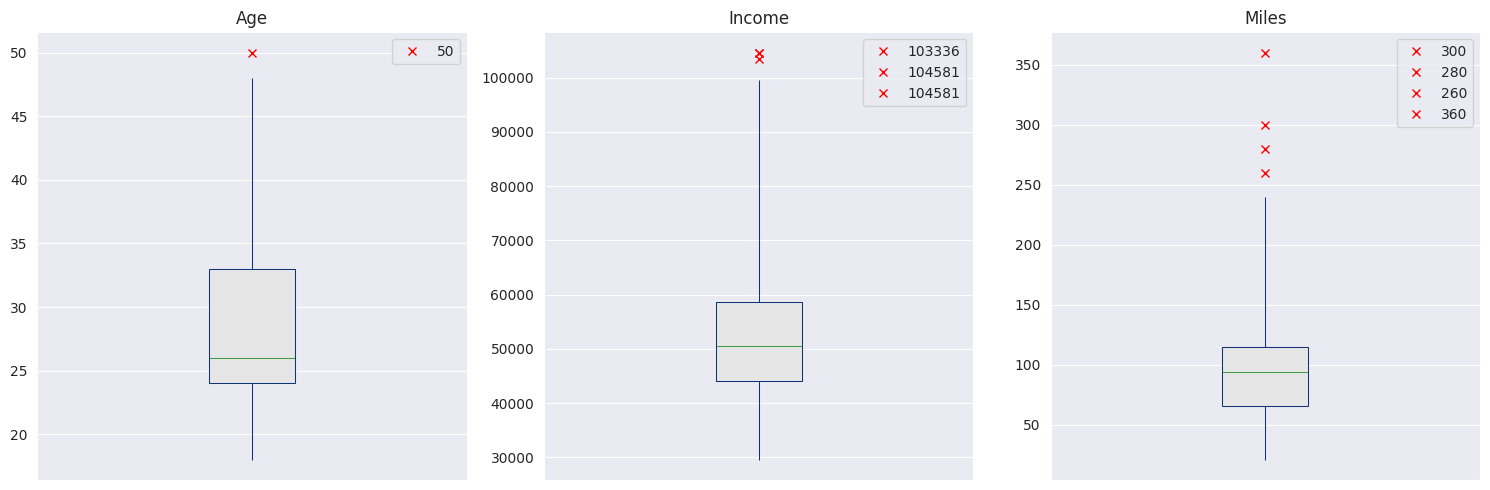

In the above boxplots —

*   The whiskers are extended to collect data points up to the 3<sup>rd</sup> *standard deviation* (i.e., `99%` of the data) at both ends.
*   Red crosses represent outliers.
*   Since there are only a handful of outliers, less than `5%`, we are going to leave them as they are.


## Birds-eye View

<div></div>

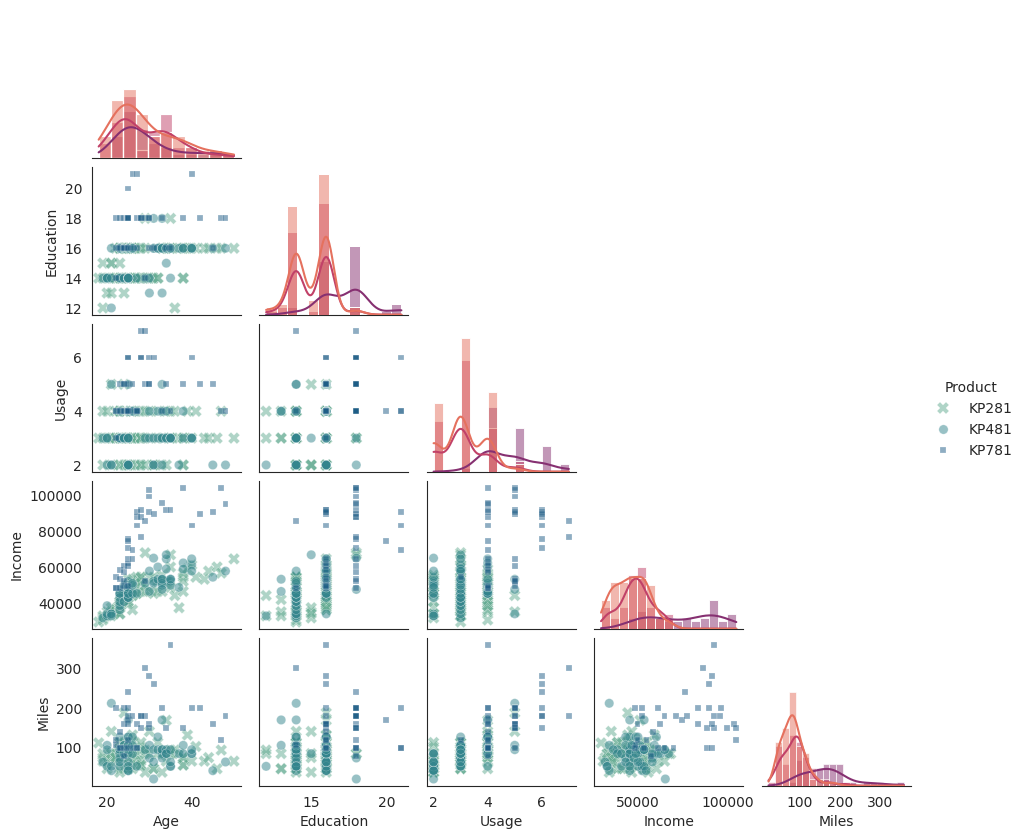

### Heatmap for Numerical attributes

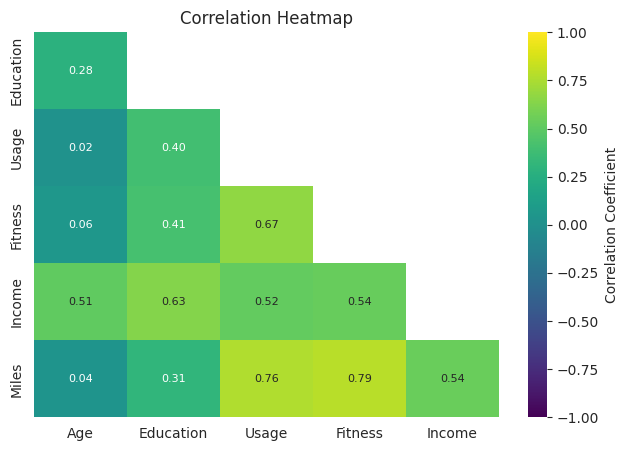

## Customer Profiling & Product Performance

In [ ]:
gender = 100 * aerofit['Gender'].value_counts() / aerofit.shape[0]
marital_status = 100 * aerofit['MaritalStatus'].value_counts() / aerofit.shape[0]
fitness = 100 * aerofit['Fitness'].value_counts() / aerofit.shape[0]
product = 100 * aerofit['Product'].value_counts() / aerofit.shape[0]

gender = gender.round(2).reset_index()
marital_status = marital_status.round(2).reset_index()
fitness = fitness.round(2).sort_index().reset_index()
product = product.round(2).reset_index()

In [ ]:
display_side_by_side(gender, marital_status, product, fitness)

,Gender,count
0,Male,57.78
1,Female,42.22
,MaritalStatus,count
0,Partnered,59.44
1,Single,40.56
,Product,count
0,KP281,44.44
1,KP481,33.33
2,KP781,22.22
,Fitness,count


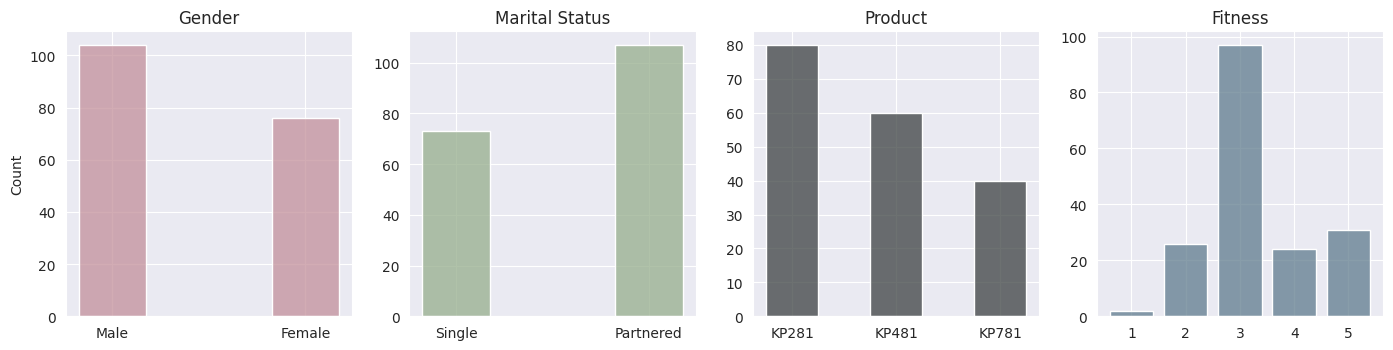

Univariate analysis —

*   There are `15%` more males and `20%` more partnered individuals who own Aerofit treadmills compared to their respective counterparts.
*   The market share of *KP481* is one-third (which is expected, given there are three products).
*   On the other hand, there is competition between entry-level and high-end products, with *KP281* capturing `10%` more market than *KP781*.
*   `31%` of people feel they are in great shape.
*   More than `50%` of people feel their fitness is average.

In [ ]:
# Calculating cross tabulation for product vs gender and product vs marital status.
product_gender = pd.crosstab(aerofit['Product'], aerofit['MaritalStatus'], margins=True, normalize=True) * 100
product_maritalstatus = pd.crosstab(aerofit['Product'], aerofit['Gender'], margins=True, normalize=True) * 100
gender_marital_status = pd.crosstab(aerofit['Gender'], aerofit['MaritalStatus'], margins=True, normalize=True) * 100
product_fitness = pd.crosstab(aerofit['Product'], aerofit['Fitness'], margins=True, normalize=True) * 100

In [ ]:
# Styling the output.
product_gender = product_gender.round(2).reset_index()
product_maritalstatus = product_maritalstatus.round(2).reset_index()
gender_marital_status = gender_marital_status.round(2).reset_index()
product_fitness = product_fitness.round(2).reset_index()

product_gender.columns.name = product_maritalstatus.columns.name = gender_marital_status.columns.name = product_fitness.columns.name = ''

In [ ]:
display_side_by_side(gender_marital_status)

,Gender,Partnered,Single,All
0,Female,25.56,16.67,42.22
1,Male,33.89,23.89,57.78
2,All,59.44,40.56,100.00


In [ ]:
display_side_by_side(product_gender, product_maritalstatus, product_fitness)

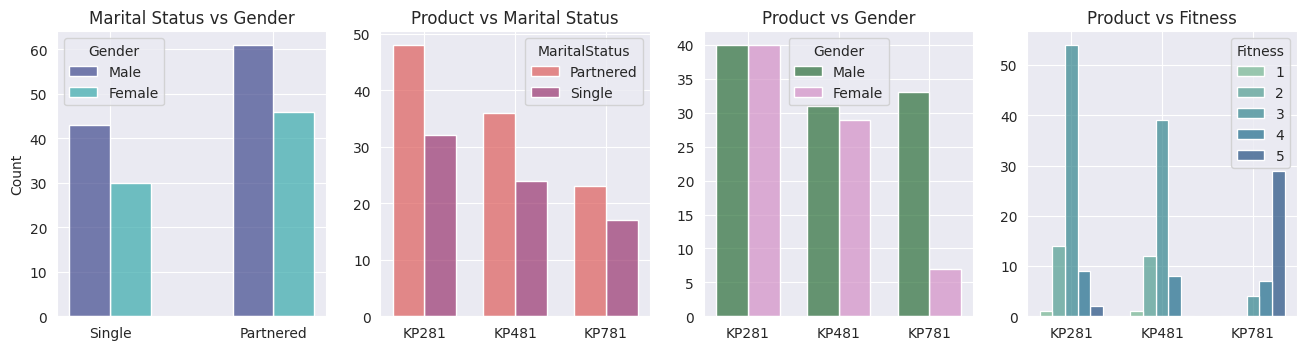

Bivariate analysis —


*   The general trend is that the population in the partnered category bought more products **in any category**.
*   Similarly, the male population has bought more products, **in any category**.
*   Also, if we consider that males have bought `15%` more Aerofit products compared to females, then `14%` of that `15%` is the high-end product, *KP781*.

People who think they are in great or excelent shape (4 or above) —
*   `6%` owns *KP281*.
*   `4%` ows *KP481*.
*   `20%` own *KP781*.


Natural questions may arise:
*   Why have partnered individuals bought more products than single individuals?
*   Or, why have males bought more high-end products compared to females?

Let's take a step further and try to answer what the contributing factors for these imbalances are.

### A dive deeper —

Here are the questions I am expecting to answer —
1.   Which age group prefers which type of treadmill?
2.   How does education teach one to take care of oneself?
3.   Does treadmill type affect the usage?
4.   Does income affect the choice of treadmill type?
5.   How do miles get affected by age and usage?
6.   Products Sales.

How to Read the Graphs —


*   We are going to answer these questions with respect to products, so the product is a steady x-axis.
*   Then we identify which numerical column we are analyzing; that will be our y-axis.
*   Then this graph is further divided into categories, which will help in analyzing the patterns within each category.

*I'll leave it to the reader to make observations within each category.*

### Which age group prefers which type of treadmill?

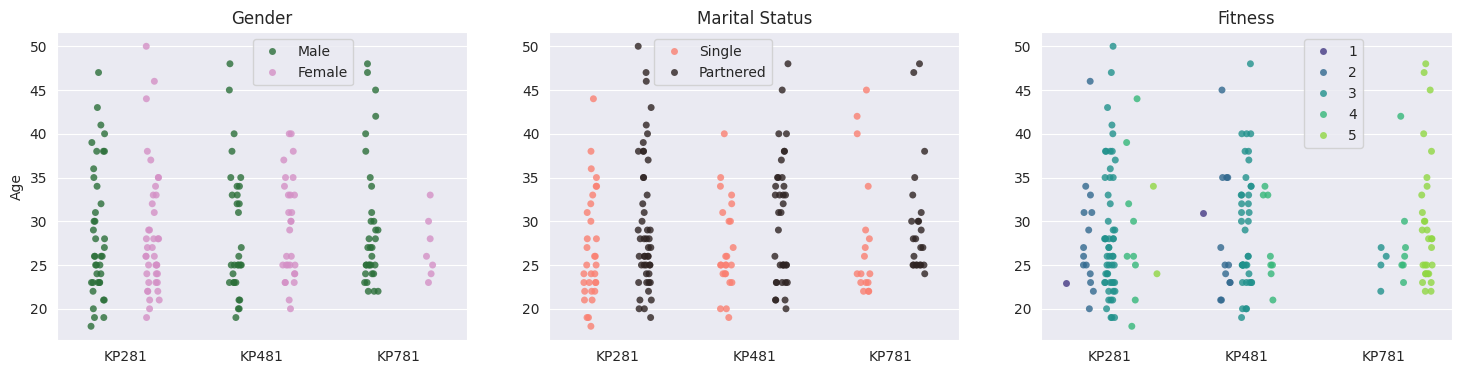

Observations —

*   The population who owns *KP781* considers their fitness level to be 3 or above and is mostly in excellent shape.
*   The pattern within any category looks the same for *KP281* and *KP481*, considering there are more males and partnered individuals in the population compared to their counterparts.
*   Also, it is evident from the graph that *KP781* is mostly owned by males, `18%` to be exact.


In general, age does **not** seem to have any impact on any category or product type.

### How does education teach one to take care of oneself?

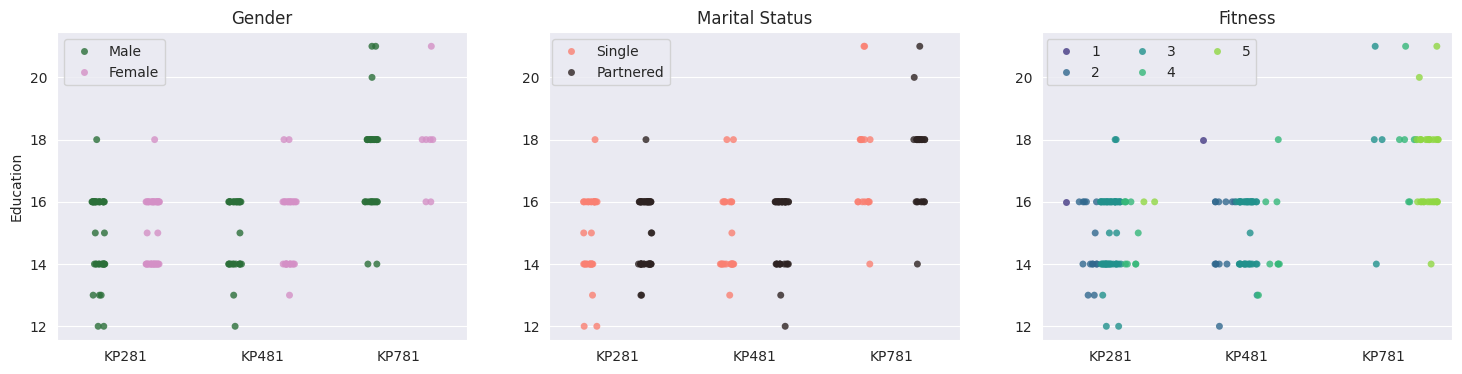

Observations —


*   The population with 14 to 16 years of education owns `71%` of *KP281* and *KP481*.
*   `18%` of the population with 16 to 18 years of education owns *KP781*.

Clearly, education impacts the type of product a person will own.


### Does treadmill type affect the usage?

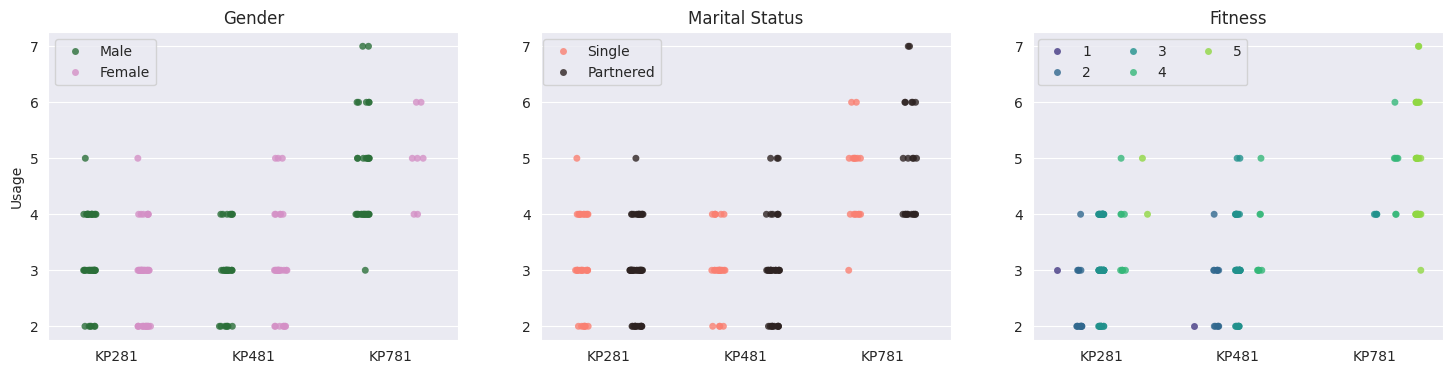

Observations —

The
difference is evident from the graphs that...
*   People who own *KP281* and *KP481* plans to use there treadmill 2 to 4 times a week.
*   And, people who owns *KP781* plans to use it atleast 4 times a week.



### Does income affect the choice of treadmill type?

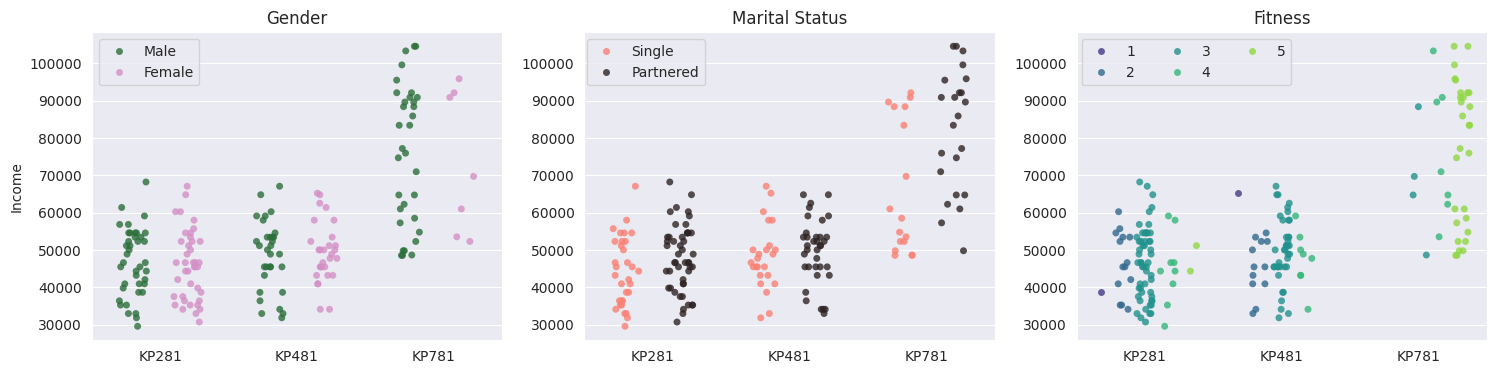

Observations —


*   The population with an income less than `50k` does not own *KP781*.
*   The population with an income of `50k` to `70k` owns all three kinds of treadmills, although density starts to decrease from left to right, i.e., as the cost of the treadmill increases.
*   The population with an income of more than `70k` owns only *KP781*.



### How do miles get affected by age and usage?

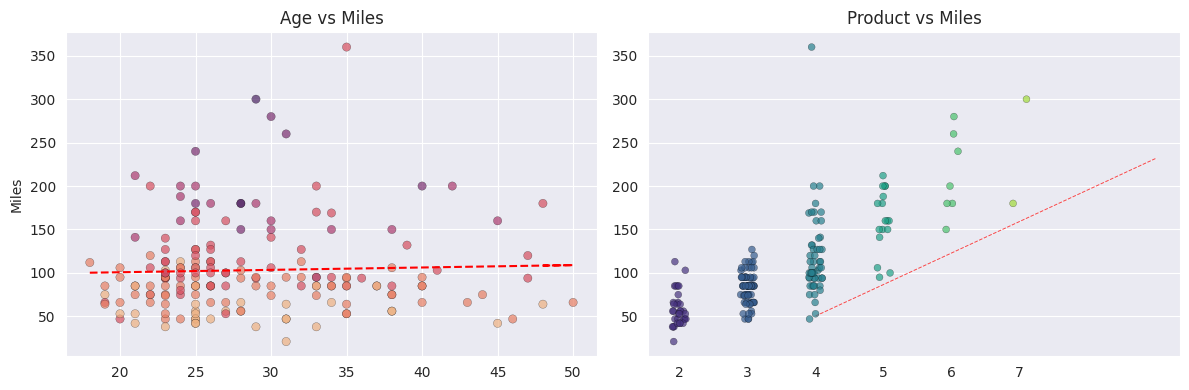

Observations —


*   **Age vs Miles** graph, there is a slight elevation in the trend line, but it is not significant since `80%` of our customers are under 35 years old. It is safe to say that age alone is not a factor in how many miles a person will run.
*   **Product vs Miles** graph, Miles tend to increase as users plan to use the treadmill more than four times a week.




### Product Sales

In [ ]:
sales = aerofit.groupby('Product')[['Product']].count() * np.array([[1500], [1750], [2500]])
sales = sales.rename(columns={'Product': 'Sales'})

share = 100 * sales / sales.sum()

display_side_by_side(sales.reset_index(), share.round(2).reset_index().rename(columns={'Sales': 'Sales (%)'}))

,Product,Sales
0,KP281,120000
1,KP481,105000
2,KP781,100000
,Product,Sales (%)
0,KP281,36.92
1,KP481,32.31
2,KP781,30.77


### Summary

*   *Age* alone does not impact the sales of a product type.
*   The population who received 14 to 16 years of education owns `71%` of treadmills.
*   The population who owns the *KP781* plans to use their treadmill at least 4 times a week.
*   Income does have an impact on the choice of treadmill, although there is an overlap for the population who earns between 50k to 70k.
*   Miles are affected by how many times the owner plans to use the treadmill. Again, age does not show any significant impact.
*   Every product type holds an almost equal share of sales in the market.

## Business Insights



*   There is noticable gap in the price between *KP481* and *KP781*.
*   There are 15% fewer females. Businesses should understand through polls or surveys whether there are fewer females into fitness and running or if they are buying competitors' products. This will help in identifying specific features or price ranges. The same argument can be made for partnered and single people.
*   There is neither mention of bulk orders, for example, from a gym or fitness chain, nor government contracts.



## Recommendations



1.   There is potential for one or two **new** products between the *KP481* and *KP781*, such as the *KP581* and *KP681*, to target customers with an income range of 60k to 80k.
2.   Businesses can **cut advertising costs** and maximize returns by targeting people with less than `50k` income with entry-level products, people with `50k` to `80k` income with mid-level products, and people with more than `80k` income with high-end products.
3.   **Usage training** and one or two months of **follow-up** on a weekly basis until the customer settles down with the product can help in customer retention and earn goodwill in the market.
4. Reaching out to gyms or fitness chains and promoting products during national competitions and the Olympics.
